In [1]:
#SD7502 Assignment 2 

In [3]:
#1: Loading and analysing data 

Info for Training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB

Info for Testing set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2786 non-null   object
dtypes: object(1)
memory usage: 21.9+ KB

First 5 rows of Training set:
      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

First 5 rows of Testing set:
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jp

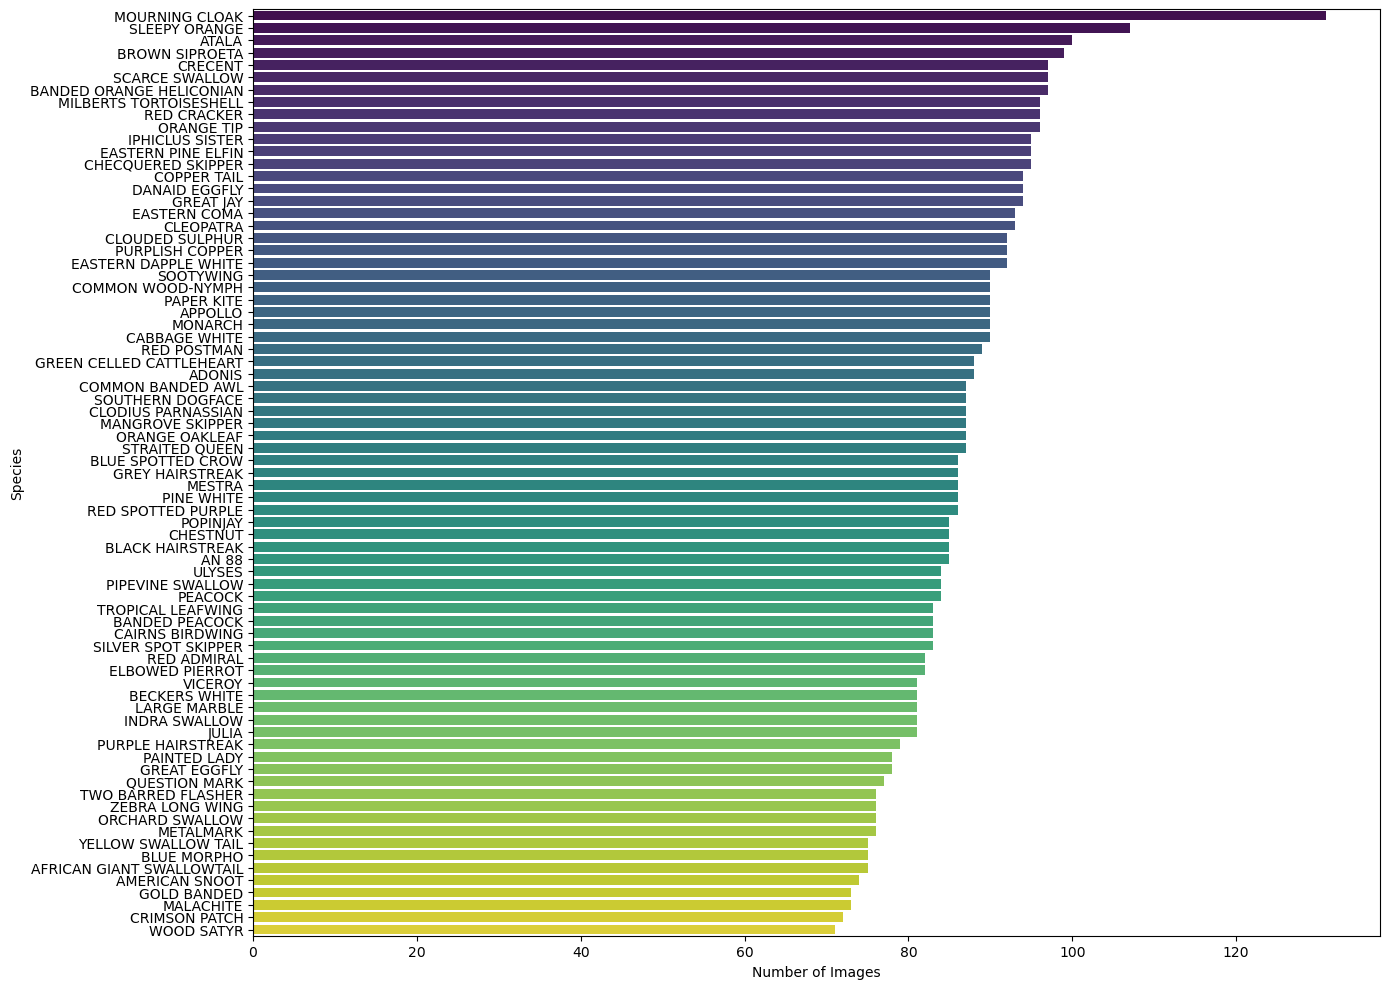

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the datasets 
training_set_path = "D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/Training_set.csv"
testing_set_path = "D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/Testing_set.csv"

#Loading the CSV files into dataframes
train_df = pd.read_csv(training_set_path)
test_df = pd.read_csv(testing_set_path)

#Displaying basic info regarding both datasets
print("Info for Training set")
train_df.info()

print("\nInfo for Testing set")
test_df.info()

#Displaying first 5 rows for each set
print("\nFirst 5 rows of Training set:")
print(train_df.head())

print("\nFirst 5 rows of Testing set:")
print(test_df.head())

#Checking for missing values
print("\nMissing values in Training set:")
print(train_df.isnull().sum())

print("\nMissing values in Testing set:")
print(test_df.isnull().sum())

#Class distribution in the training set - Important to indicate how many examples belong to each class
class_distribution = train_df['label'].value_counts()

#Plotting the summary
plt.figure(figsize=(14, 10))
sns.barplot(y=class_distribution.index, x=class_distribution.values, hue=class_distribution.index, palette="viridis", legend=False)
plt.xlabel("Number of Images")
plt.ylabel("Species")
plt.xticks(rotation=0)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
#2A Define a Data Loader class and transformation pipeline 

In [27]:
import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image

#Defining the transformation pipeline for preprocessing images
transform = transforms.Compose([
    transforms.Resize((224, 224)), #To resize images to a resolution of 224x224
    transforms.ToTensor(), #To convert images to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #To normalize using ImageNet standards
])

#Defining a custom Dataset class
class ButterflyDataset(Dataset):
    #Loads the images and their corresponding labels
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    #Function to return the total number of samples in the dataset 
    def __len__(self):
        return len(self.data)

    #Function to get a specific sample when called by the dataloader
    def __getitem__(self, idx):
        img_name = f"{self.root_dir}/{self.data.iloc[idx, 0]}"
        image = Image.open(img_name).convert("RGB")
        label = self.data.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

#Initalizing Dataset and Dataloader
train_dataset = ButterflyDataset(csv_file='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/Training_set.csv', #Path to CSV file
                                root_dir='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/train', #Path to images
                                transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#Loading the test data
test_dataset = ButterflyDataset(csv_file='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/Testing_set.csv', #Path to CSV file
                                root_dir='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/test', #Path to images
                                transform=transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
#2B Training, Validating, and Testing the models 

In [29]:
from torch.utils.data import random_split

#Loading the full training set
full_train_dataset = ButterflyDataset(csv_file='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/Training_set.csv', #Path to CSV file
                                root_dir='D:/GitHub/SD7502-Project2-2220115_2220145/Datasets/archive/train', #Path to images
                                transform=transform)

#Defining the split ratios
train_size = int(0.8 * len(full_train_dataset)) #80% for training
val_size = len(full_train_dataset) - train_size #20% for validation (remainder)

#Splitting the dataset into training and validation sets
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

#Preparing DataLoaders for training, validation, and test sets
#NOTE: Training and Test sets have been prepared in the previous cell
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#Printing the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 5199
Validation set size: 1300
Test set size: 2786


In [ ]:
#2C Developing deep learning models to construct classification models

In [ ]:
#Convolutional Neural Network (CNN)

In [5]:
import torch.nn as nn

class CNNModel(nn.Module):
    def init(self, num_classes=10):
        super(CNNModel, self).init()
        self.conv1 = nn.Conv2d(3, 16, kernal_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernal_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernal_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernal_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

print("Complete!")

Complete!


In [7]:
#Multilayer Perceptron (MLP)

In [11]:
class MLPModel(nn.Module):
    def __init__(self, num_classes=10):
        super(MLPModel, self).__init__()
        #Flattening the image (3 channels * 224x224)
        self.fc1 = nn.Linear(3 * 224 * 224, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)


    def forward(self, x):
        #Flattening the input
        x = x.view(-1, 3 * 224 * 224)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print("Complete!")

Complete!


In [13]:
#Recurrent Neural Network (RNN) with LSTM

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, num_classes=10, input_size=64, hidden_size=128, num_layers=2):
        super(RNNModel, self).__init__()
        self.ltsm = nn.LTSM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        #Reshaping to (batch_size, num_patches, and patch_size)
        x = x.view(-1, 224, 224) #Treating each row as a time stop
        lstm_out, _ = self.ltsm(x)
        lstm_out = lstm_out[:, -1, :] #Getting the output of the last time step
        x = self.fc(lstm_out)
        return x

print("Complete!")